In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [5]:
df.info() # temiz bir data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [6]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


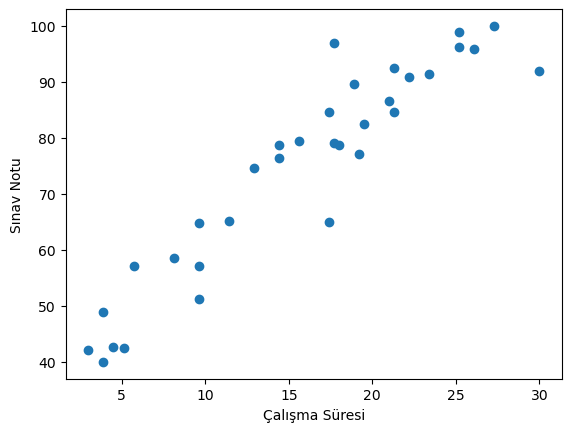

In [12]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Çalışma Süresi")
plt.ylabel("Sınav Notu")
plt.show()

In [13]:
#independent and dependent Feature

In [48]:
X = df[["Study Hours"]]
y = df["Exam Score"]

In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
 #Test - Train - Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [53]:
# x ikiye böldü %20 test %80 traine veriyor 

In [54]:
X_test

,Study Hours
25,5.1
14,21.0
30,23.4
16,5.7
24,9.6
20,3.9
19,21.3


In [55]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [56]:
#Standardize the data set

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
 #balanced feature values
# efficient gradient descent 

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
X_train # -1 1 arasında gezecek şekilde yeniden düzenled,

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [62]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [63]:
#fitTransform  =  standart ediyor standart sapma ile
#Transform =  yukarıda fit transformada hesaplana  mean ile normalize ediyor  # veri sızmasını engellemek istiyoruz

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regression =  LinearRegression()

In [66]:
regression.fit(X_train,y_train)

LinearRegression()

In [67]:
print("Coefficient: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient:  [16.17860223]
Intercept:  76.9076923076923


In [68]:
#Bu şu demek denklem  = y= 76.91 + 16.18x

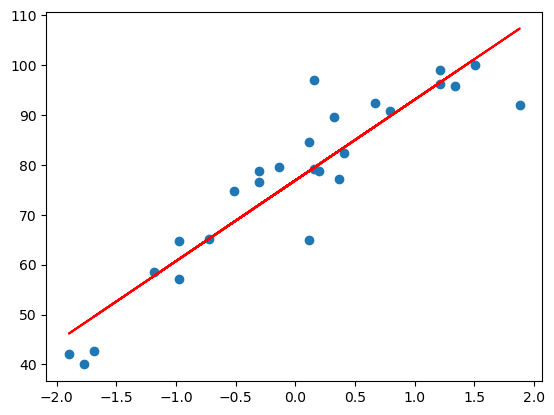

In [69]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")

In [70]:
#20 saat çalışan biri kaç alacak

In [71]:
regression.predict([[20]])

array([400.47973694])

In [72]:
regression.predict(scaler.transform([[20]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [73]:
scaler.transform([[20]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [82]:
regression.predict(scaler.transform([[25]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.0329235])

In [85]:
regression.predict(scaler.transform([[27]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([100.56372998])